In [1]:
import pandas as pd
import numpy as np
import os
import random
import spacy
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import sys
from wordcloud import WordCloud
import json

In [2]:
# reading into python all csv files
df_CA = pd.read_csv(r"C:\Users\Aishwarya\Downloads\Acads\Semester 2\Prof Bono\Bono Project\CAvideos.csv", encoding='utf-8')
df_DE = pd.read_csv(r"C:\Users\Aishwarya\Downloads\Acads\Semester 2\Prof Bono\Bono Project\DEvideos.csv", encoding='utf-8')
df_FR = pd.read_csv(r"C:\Users\Aishwarya\Downloads\Acads\Semester 2\Prof Bono\Bono Project\FRvideos.csv", encoding='utf-8')
df_GB = pd.read_csv(r"C:\Users\Aishwarya\Downloads\Acads\Semester 2\Prof Bono\Bono Project\GBvideos.csv", encoding='utf-8')
df_IN = pd.read_csv(r"C:\Users\Aishwarya\Downloads\Acads\Semester 2\Prof Bono\Bono Project\INvideos.csv", encoding='utf-8')
df_JP = pd.read_csv(r"C:\Users\Aishwarya\Downloads\Acads\Semester 2\Prof Bono\Bono Project\JPvideos.csv", encoding='utf-8')
df_KR = pd.read_csv(r"C:\Users\Aishwarya\Downloads\Acads\Semester 2\Prof Bono\Bono Project\KRvideos.csv", encoding='utf-8')
df_MX = pd.read_csv(r"C:\Users\Aishwarya\Downloads\Acads\Semester 2\Prof Bono\Bono Project\MXvideos.csv", encoding='utf-8')
df_RU = pd.read_csv(r"C:\Users\Aishwarya\Downloads\Acads\Semester 2\Prof Bono\Bono Project\RUvideos.csv", encoding='utf-8')
df_US = pd.read_csv(r"C:\Users\Aishwarya\Downloads\Acads\Semester 2\Prof Bono\Bono Project\USvideos.csv", encoding='utf-8')

In [38]:
names_of_dataframes = [df_CA,df_DE,df_FR,df_GB,df_IN,df_JP,df_KR,df_MX,df_RU,df_US]
langlist = []
for i in names_of_dataframes:
    if (TextBlob(i['description'][0]).detect_language() == 'en'):
        langlist.append('en')
    else:
        langlist.append('not_en')

In [39]:
langlist

['en',
 'not_en',
 'not_en',
 'en',
 'en',
 'not_en',
 'not_en',
 'not_en',
 'not_en',
 'en']

In [3]:
#adding the "Country" column for all datasets
names_of_countries = ['CA','DE','FR','GB','IN','JP','KR','MX','RU','US']
names_of_dataframes = [df_CA,df_DE,df_FR,df_GB,df_IN,df_JP,df_KR,df_MX,df_RU,df_US]
for i in range(len(names_of_countries)):
    names_of_dataframes[i]['Country'] = names_of_countries[i]

In [4]:
#combining all dataframes into one dataframe
names_of_dataframes = [df_DE,df_FR,df_GB,df_IN,df_JP,df_KR,df_MX,df_RU,df_US]
#textproc_df = pd.DataFrame(df_CA)
final_df = pd.DataFrame(df_CA)
for i in names_of_dataframes:
    #if (TextBlob(i['title'][random.randint(1,10)]).detect_language() == 'en'):
       # textproc_df = textproc_df.append(i)
    final_df = final_df.append(i)

# Final_df Analysis 

Feature engineering on only numerical variables

In [5]:
#We first study the shape of this dataset
final_df.shape

(375942, 17)

In [6]:
final_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA


In [7]:
# check whether there are any columns that have null/missing values.
final_df.isna().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19478
Country                       0
dtype: int64

In [8]:
final_df.duplicated().sum()

12570

In [9]:
final_df.drop_duplicates(inplace=True)

In [10]:
final_df.duplicated(subset='video_id').sum()

179123

In [11]:
final_df[final_df.video_id == 'uxbQATBAXf8']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
34120,uxbQATBAXf8,18.12.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",9399654,268149,2400,6739,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,CA
34327,uxbQATBAXf8,18.13.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",13293647,334533,3302,8333,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,CA
34821,uxbQATBAXf8,18.15.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",15960127,374827,3823,9059,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,CA
33980,uxbQATBAXf8,18.11.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",4369014,147238,997,3929,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,DE
34145,uxbQATBAXf8,18.12.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",9399654,268149,2400,6739,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,DE
34404,uxbQATBAXf8,18.13.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",13293647,334533,3302,8333,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,DE
33993,uxbQATBAXf8,18.11.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",4369014,147238,997,3929,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,FR
34203,uxbQATBAXf8,18.12.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",9399654,268149,2400,6739,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,FR
33137,uxbQATBAXf8,18.11.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",4369014,147238,997,3929,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,GB
33297,uxbQATBAXf8,18.12.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",9399654,268143,2399,6739,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,GB


In [12]:
# Create a column named 'trending_date_counts' that indicates the number of time that video is on trending.
final_df['trending_date_count'] = final_df.groupby(['video_id'])['trending_date'].transform('count')

In [13]:
# Now, we will visualise a few lines of this new column
final_df['trending_date_count'].head(10)

0    26
1     9
2    13
3    13
4    23
5     3
6     4
7    18
8     6
9     3
Name: trending_date_count, dtype: int64

In [14]:
# remove the other rows with the same video_id and older numbers.
final_df.drop_duplicates(subset='video_id', keep='last', inplace=True)

In [15]:
# Re-verifying that our non-duplicate row now has only one unique row in the dataframe
final_df[final_df.video_id == 'uxbQATBAXf8']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,trending_date_count
34792,uxbQATBAXf8,18.15.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",15960127,374825,3823,9059,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,US,22


In [16]:
final_df.reset_index(drop = True, inplace = True)


In [17]:
#change the trending_date
final_df['trending_date'].replace('\.','-',regex=True,inplace=True) #'-' no regular expression
type(final_df['trending_date'][0])
final_df['new_column']='20'
final_df['trending_date'] = final_df.agg(lambda x: f"{x['new_column']}{x['trending_date']}", axis=1)
final_df['trending_date'] = pd.to_datetime(final_df['trending_date'],format='%Y-%d-%m')         
del final_df['new_column']                            
#type(final_df['trending_date'][0])

In [18]:
#Now, we view the result
final_df['trending_date'].head(3)

0   2017-11-14
1   2017-11-14
2   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [19]:
#change the publish_time column to a better, readable format
final_df.insert(5,'publish_date',final_df['publish_time'].map(lambda name:name.split('T')[0])) 
final_df['publish_time']=final_df['publish_time'].map(lambda name:name.split('T')[1])
final_df['publish_date'] = pd.to_datetime(final_df['publish_date']) 
final_df['publish_time'] = pd.to_datetime(final_df['publish_time']) 

In [20]:
#Now, we will study the data-types of each column
final_df.info() #df.dtypes
final_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184249 entries, 0 to 184248
Data columns (total 19 columns):
video_id                  184249 non-null object
trending_date             184249 non-null datetime64[ns]
title                     184249 non-null object
channel_title             184249 non-null object
category_id               184249 non-null int64
publish_date              184249 non-null datetime64[ns]
publish_time              184249 non-null datetime64[ns, UTC]
tags                      184249 non-null object
views                     184249 non-null int64
likes                     184249 non-null int64
dislikes                  184249 non-null int64
comment_count             184249 non-null int64
thumbnail_link            184249 non-null object
comments_disabled         184249 non-null bool
ratings_disabled          184249 non-null bool
video_error_or_removed    184249 non-null bool
description               171143 non-null object
Country                   184249 non-n

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_date', 'publish_time', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description', 'Country',
       'trending_date_count'],
      dtype='object')

In [21]:
# Translate the boolean values into numeric values
final_df["comments_disabled"]=final_df["comments_disabled"].astype(int)
final_df["ratings_disabled"]=final_df["ratings_disabled"].astype(int)
final_df["video_error_or_removed"]=final_df["video_error_or_removed"].astype(int)

In [22]:
type(final_df['comments_disabled'][9]) # confirming that our conversion was successful

numpy.int32

In [23]:
# Use normalization to reduce skewness of the data if necessary
from sklearn import preprocessing
import numpy as np
# Normalize views
x_array = np.array(final_df['views'])
normalized_X = preprocessing.normalize([x_array])
normalized_X_dataframe = pd.DataFrame(normalized_X)   
final_df['views']=normalized_X_dataframe.T
#display(df['views'])

# Normalize likes
x_array = np.array(final_df['likes'])
normalized_Y = preprocessing.normalize([x_array])
normalized_Y_dataframe = pd.DataFrame(normalized_Y)   
final_df['likes']=normalized_Y_dataframe.T


# Normalize dislikes
x_array = np.array(final_df['dislikes'])
normalized_Z = preprocessing.normalize([x_array])
normalized_Z_dataframe = pd.DataFrame(normalized_Z)   
final_df['dislikes']=normalized_Z_dataframe.T


# Normalize comment_count
x_array = np.array(final_df['comment_count'])
normalized_C = preprocessing.normalize([x_array])
normalized_C_dataframe = pd.DataFrame(normalized_C)   
final_df['comment_count']=normalized_C_dataframe.T

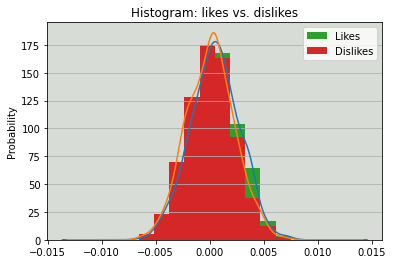

In [24]:
# draw the graph from the distribution between 'likes' and 'dislikes'
means = final_df['likes'].mean(), final_df['dislikes'].mean()
stdevs = final_df['likes'].std(axis = 0, skipna = True), final_df['dislikes'].std(axis = 0, skipna = True)
dist = pd.DataFrame(
np.random.normal(loc=means, scale=stdevs, size=(1000, 2)),
columns=['Likes', 'Dislikes'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='Histogram: likes vs. dislikes')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

# Text_df Analysis

In [25]:
names_of_countries = ['CA','DE','FR','GB','IN','JP','KR','MX','RU','US']

In [82]:
final_df['Country'].value_counts()

RU    34081
MX    32643
FR    27557
DE    23327
IN    15776
KR    15537
CA    14865
JP    12155
US     6282
GB     2026
Name: Country, dtype: int64

In [87]:
final_df['Country'].unique()

array(['CA', 'DE', 'FR', 'GB', 'IN', 'JP', 'KR', 'MX', 'RU', 'US'],
      dtype=object)

In [40]:
langlist

['en',
 'not_en',
 'not_en',
 'en',
 'en',
 'not_en',
 'not_en',
 'not_en',
 'not_en',
 'en']

In [93]:
qualified_countries = ['CA','IN','US','GB']


We can see that dataframes CA, GB,IN and US are in english.

In [94]:
textdf = final_df[final_df['Country'].isin(['CA', 'IN','GB','US'])]

In [95]:
textdf.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,trending_date_count
0,FyZMnhUtLfE,2017-11-14,猎场 | Game Of Hunting 12【TV版】（胡歌、張嘉譯、祖峰等主演）,大劇獨播,1,2017-11-12,2020-04-15 16:00:01+00:00,"電視劇|""大陸電視劇""|""猎场""|""职场""|""商战""|""爱情""|""都市""|""胡歌""|""陈龙""...",0.000233,0.000011,0.000010,0.000054,https://i.ytimg.com/vi/FyZMnhUtLfE/default.jpg,0,0,0,Thanks for watching the drama! Help more peopl...,CA,1
1,gifPYwArCVQ,2017-11-14,Fake Pet Smart Employee Prank!,NELK,23,2017-11-13,2020-04-15 01:30:01+00:00,"prank|""pranks""|""nelk""|""nelkfilmz""|""nelkfilms""",0.000818,0.002232,0.000211,0.002789,https://i.ytimg.com/vi/gifPYwArCVQ/default.jpg,0,0,0,3 Days left to cop NELK merch: https://nelk.ca...,CA,1
2,fy-CuCzaPp8,2017-11-14,Rooster Teeth Animated Adventures - Drunk Baby...,Rooster Teeth,1,2017-11-13,2020-04-15 14:00:03+00:00,"Rooster Teeth|""RT""|""animation""|""television""|""f...",0.000453,0.000979,0.000024,0.000144,https://i.ytimg.com/vi/fy-CuCzaPp8/default.jpg,0,0,0,Miles gets stuck at work one night watching ov...,CA,1


In [96]:
textdf['Country'].unique()

array(['CA', 'GB', 'IN', 'US'], dtype=object)

In [106]:
textdf.shape

(38949, 21)

In [97]:
textdf['description_url']=textdf["description"].str.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

C:\Users\Aishwarya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
textdf['description_url']

0         [https://goo.gl/q8oOgq, https://goo.gl/bXGIIs\...
1         [https://nelk.ca\n\nFollow, https://twitter.co...
2         [http://bit.ly/2uRn6Ox\n\nAudio, http://rooste...
3         [https://www.youtube.com/watch?v=dFm7n5tQzrU\n...
4         [http://bit.ly/GMM1218, http://bit.ly/GMM1217,...
                                ...                        
184244                                                   []
184245                                                  NaN
184246    [https://goo.gl/C92AmbSHOP, https://goo.gl/VN6...
184247    [https://bit.ly/HISHEPlaylistSubscribe, https:...
184248    [https://www.callofduty.com/blackops4/buyFollo...
Name: description_url, Length: 38949, dtype: object

In [99]:
textdf['description_url'].isnull().sum()

1077

In [100]:
textdf.shape

(38949, 20)

In [101]:
textdf['description_url']=textdf['description_url'].fillna(0)

C:\Users\Aishwarya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
# Calculate the length of each observation of description_url column
textdf['len']=textdf['description_url'].apply(lambda x: len(x) if x!=0 else 0)

C:\Users\Aishwarya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Queenie , please see the error in following cell

In [104]:
# Remove "\\n" in description_url column
urls=[]
for i in range(len(textdf)):
    if textdf['len'][i]!=0:
        url=[]
        for j in textdf['description_url'][i]:
            suburl=0
            suburl=j.split('\\n')
            for item in range(len(suburl)):
                if suburl[item].find('http')!=-1:
                    url.append(suburl[item])
        urls.append(url)
    else:
        urls.append(0)

KeyError: 14865

In [ ]:
# Create a column to save the pure urls
df['pure_description_url']=urls